<a href="https://colab.research.google.com/github/BharatXBhalla/Data-Analytics-CDAC/blob/main/Assignments/Assignment_2_EarthQuakeData_DataWrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("earthquake.csv.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

## Handling Missing Values

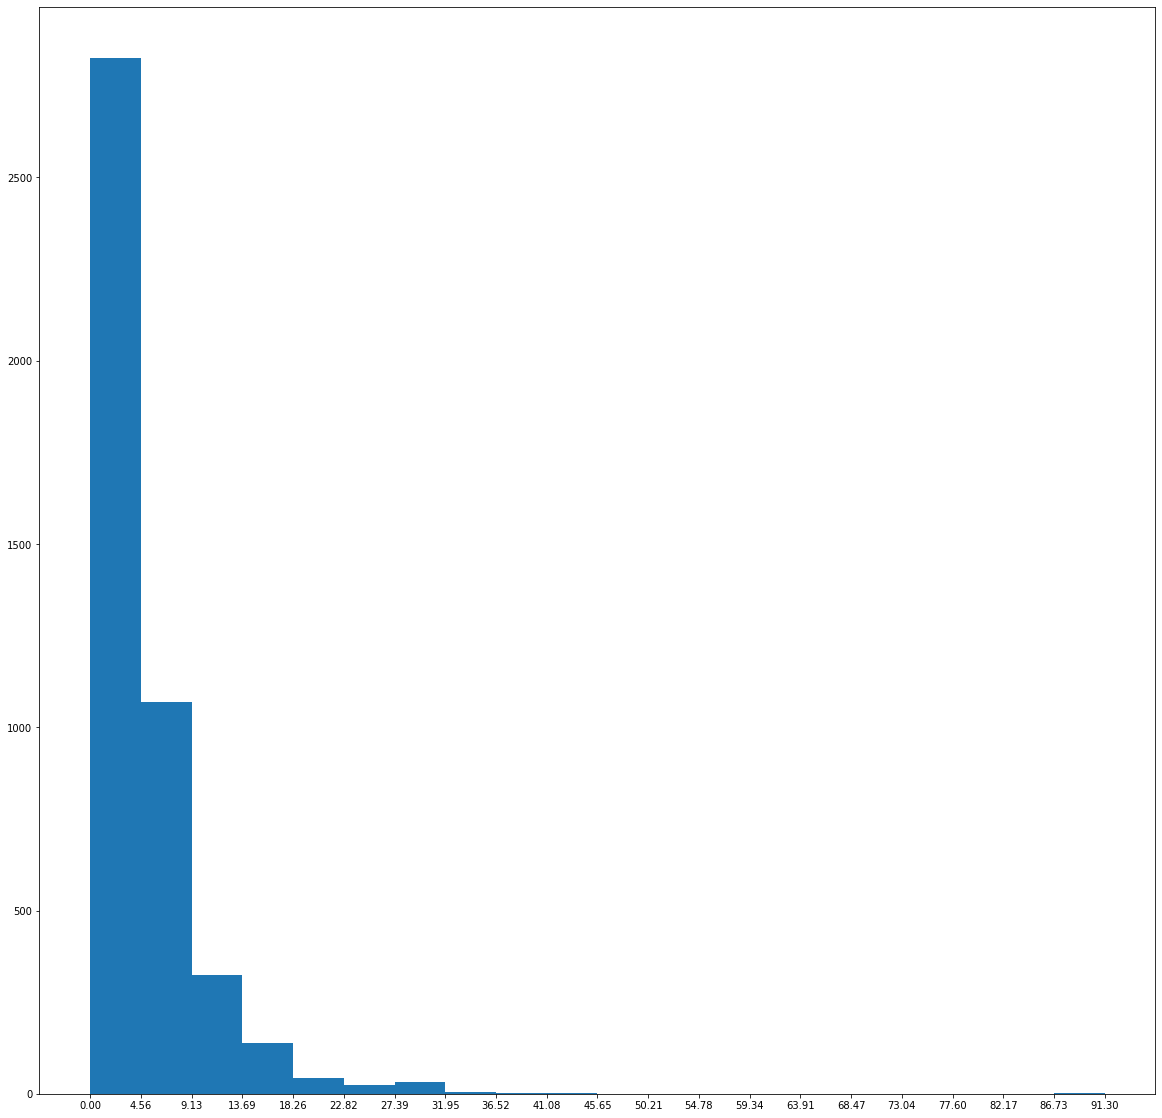

In [97]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Depth Error"],bins=20)
plt.xticks(bins)
plt.show()

In [98]:
df["Depth Error"].min()

0.0

Most of Depth Error Lies in 0-4.56 Therefore it is safe to assign a depth Error of 2 for all NaN Values

In [99]:
df["Depth Error"].fillna(2.0,inplace=True)

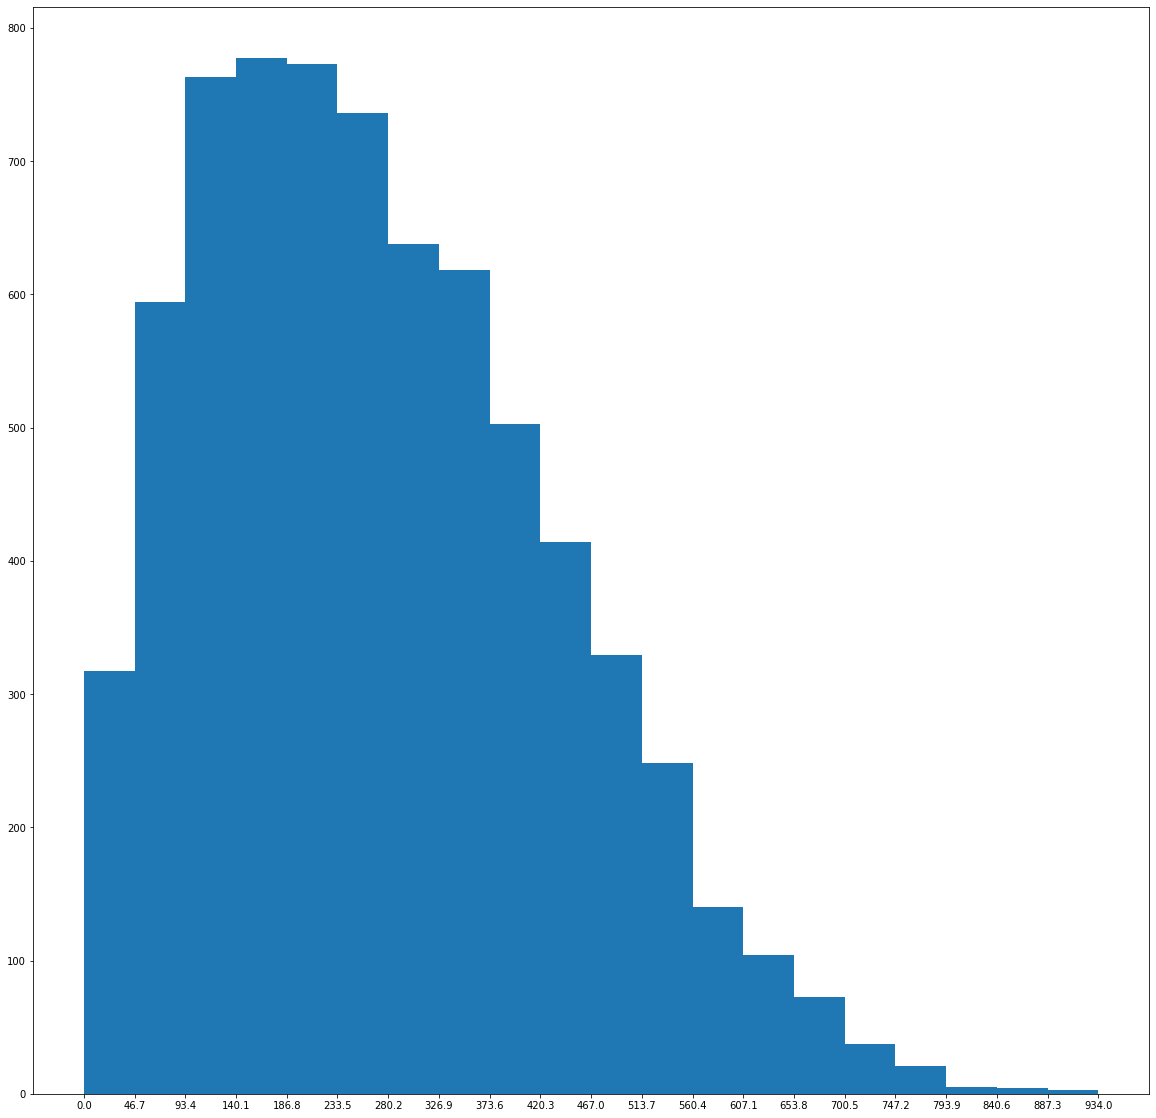

In [100]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Depth Seismic Stations"],bins=20)
plt.xticks(bins)
plt.show()

Since Data is Postively Skewed we can replace with mode

In [117]:
df["Depth Seismic Stations"].fillna(df["Depth Seismic Stations"].mode()[1],inplace=True)

In [128]:
df["Magnitude Type"].fillna(df["Magnitude Type"].mode()[0],inplace=True)

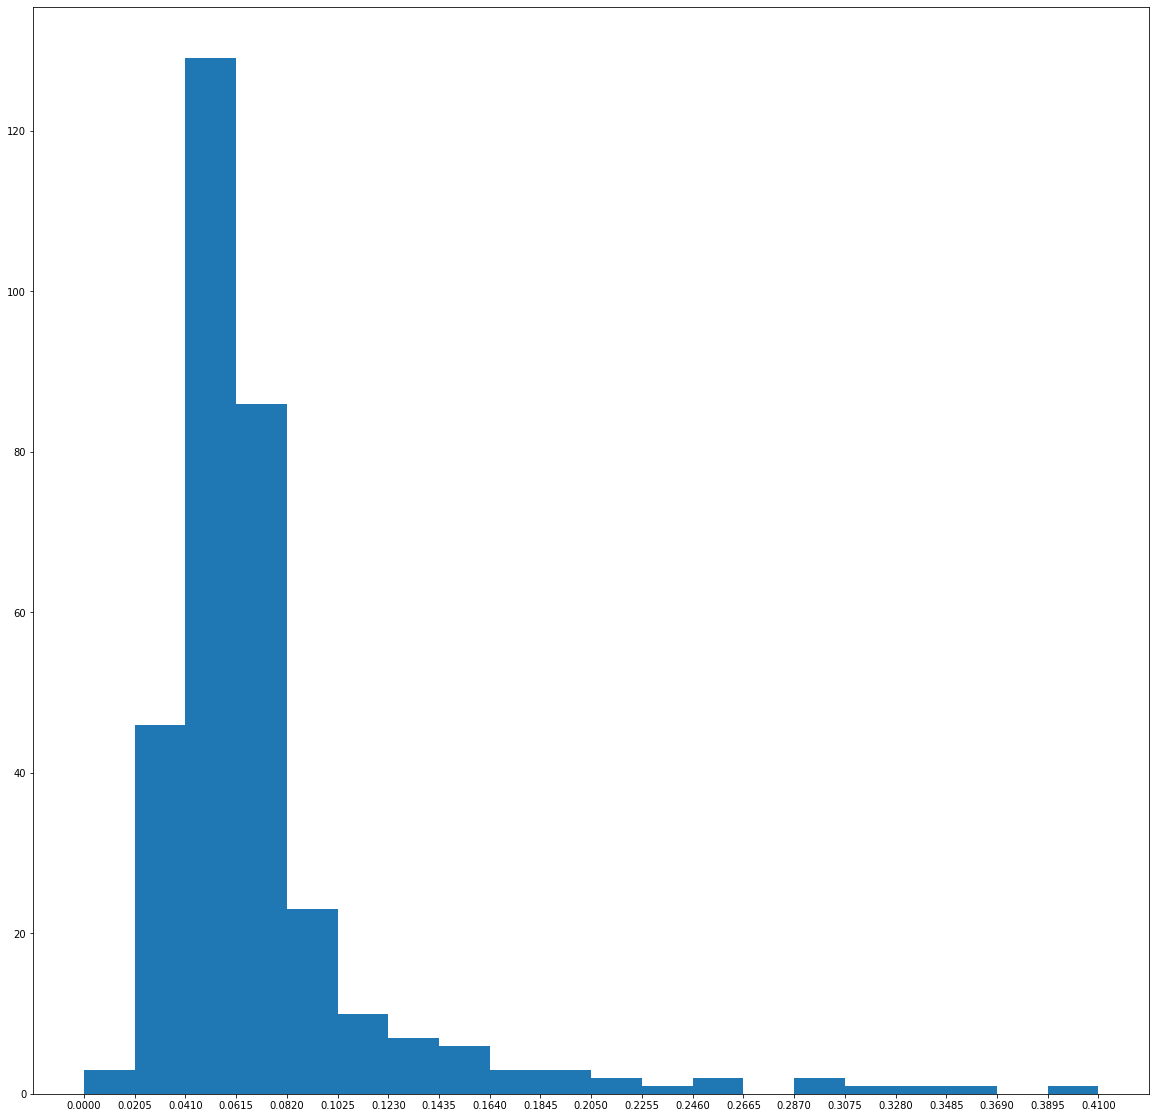

In [103]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Magnitude Error"],bins=20)
plt.xticks(bins)
plt.show()


In [126]:
df["Magnitude Error"].fillna(df["Magnitude Error"].mode()[0],inplace=True)
df["Magnitude Error"].mode()

0    0.048
dtype: float64

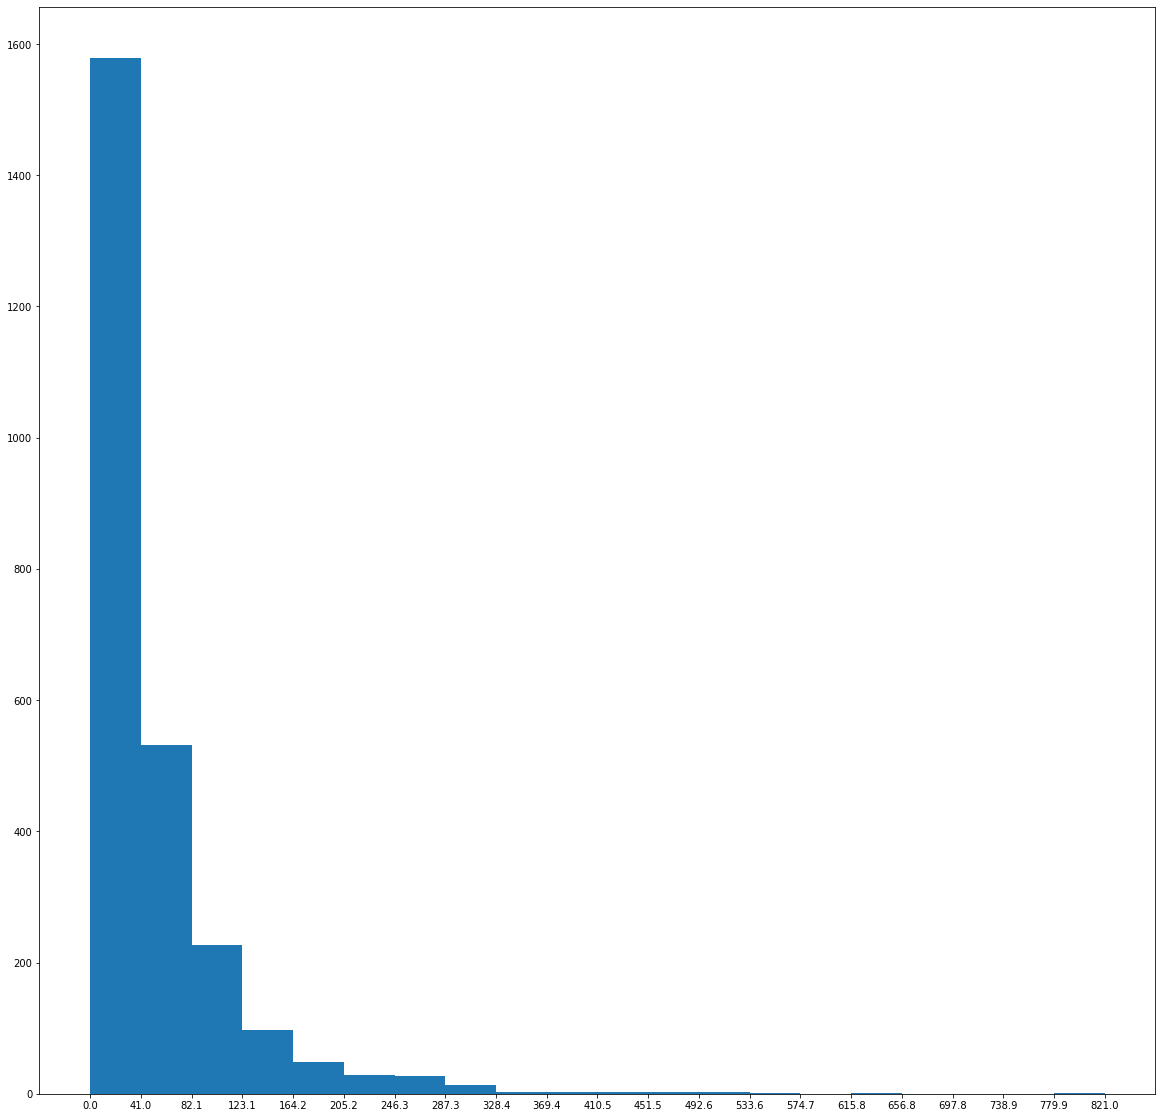

In [105]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Magnitude Seismic Stations"],bins=20)
plt.xticks(bins)
plt.show()

In [106]:
df["Magnitude Seismic Stations"].fillna(0.0,inplace=True)

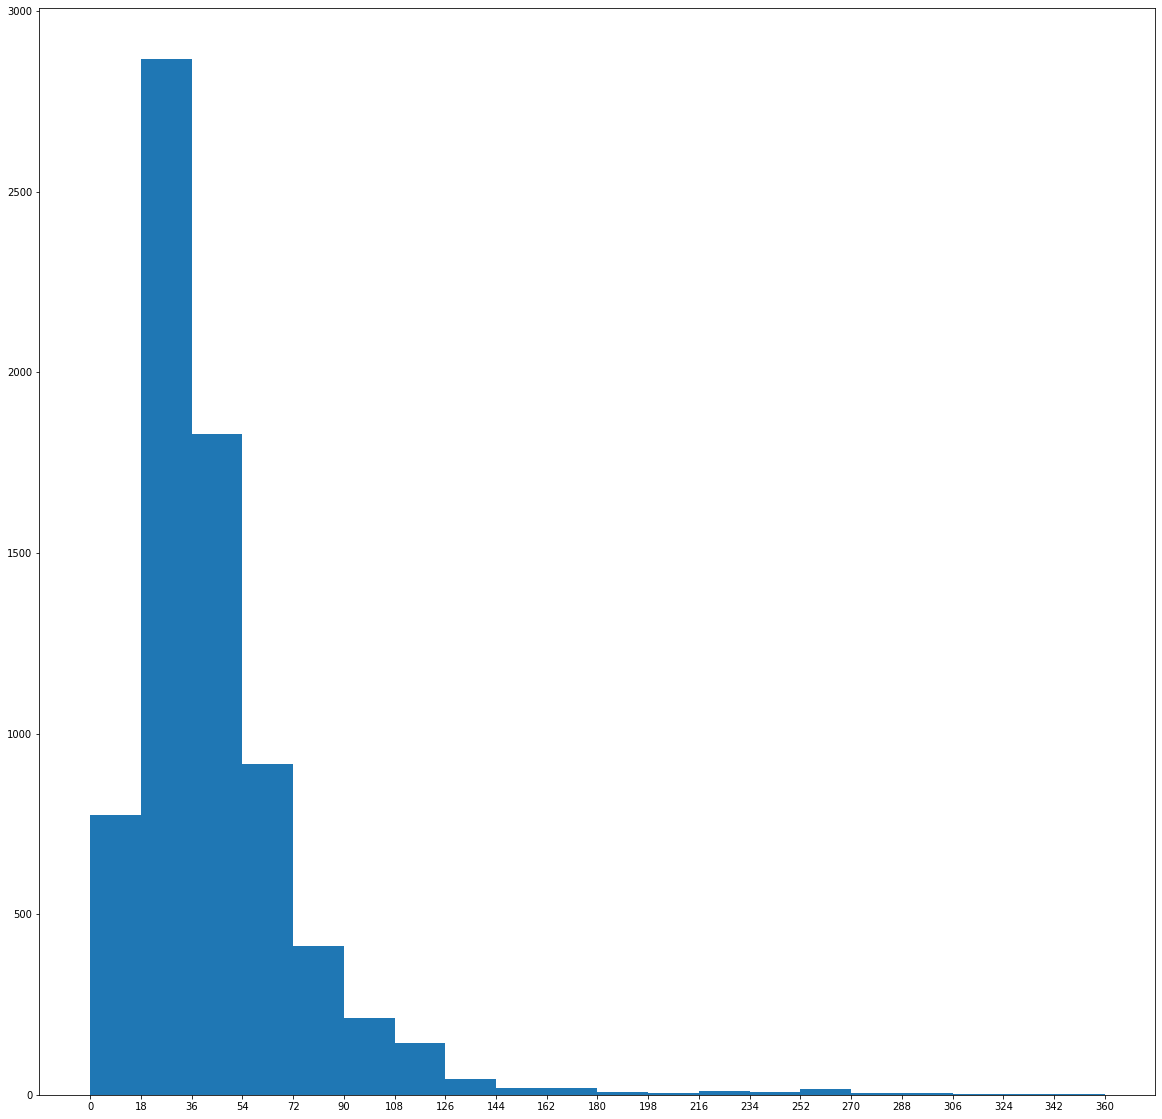

In [107]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Azimuthal Gap"],bins=20)
plt.xticks(bins)
plt.show()

In [108]:
df["Azimuthal Gap"].fillna(df["Azimuthal Gap"].mean(),inplace=True)

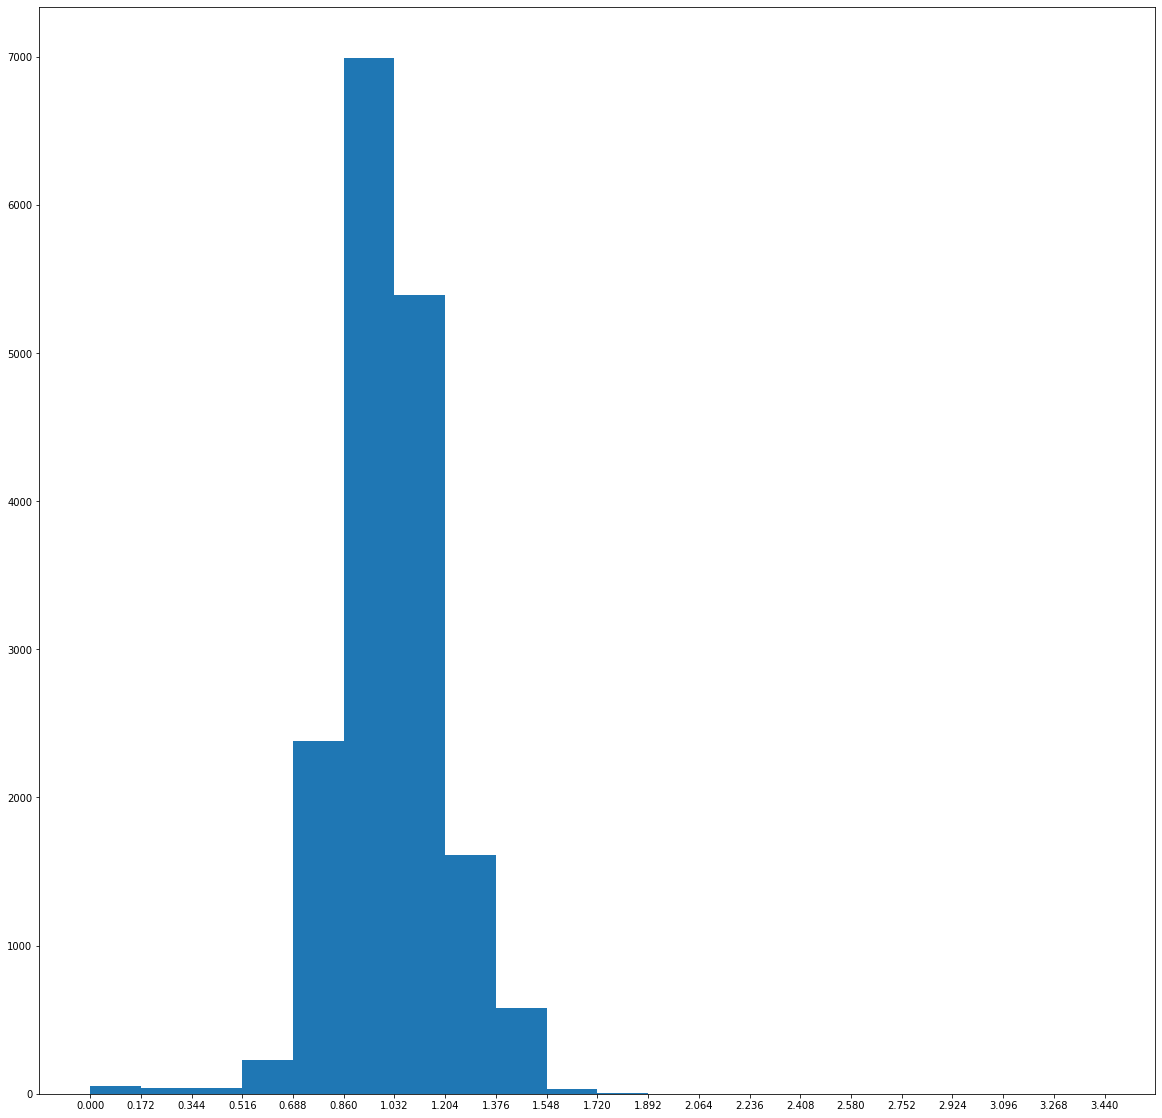

In [109]:
plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Root Mean Square"],bins=20)
plt.xticks(bins)
plt.show()

In [120]:
df["Root Mean Square"].fillna(df["Root Mean Square"].mode()[0],inplace=True)

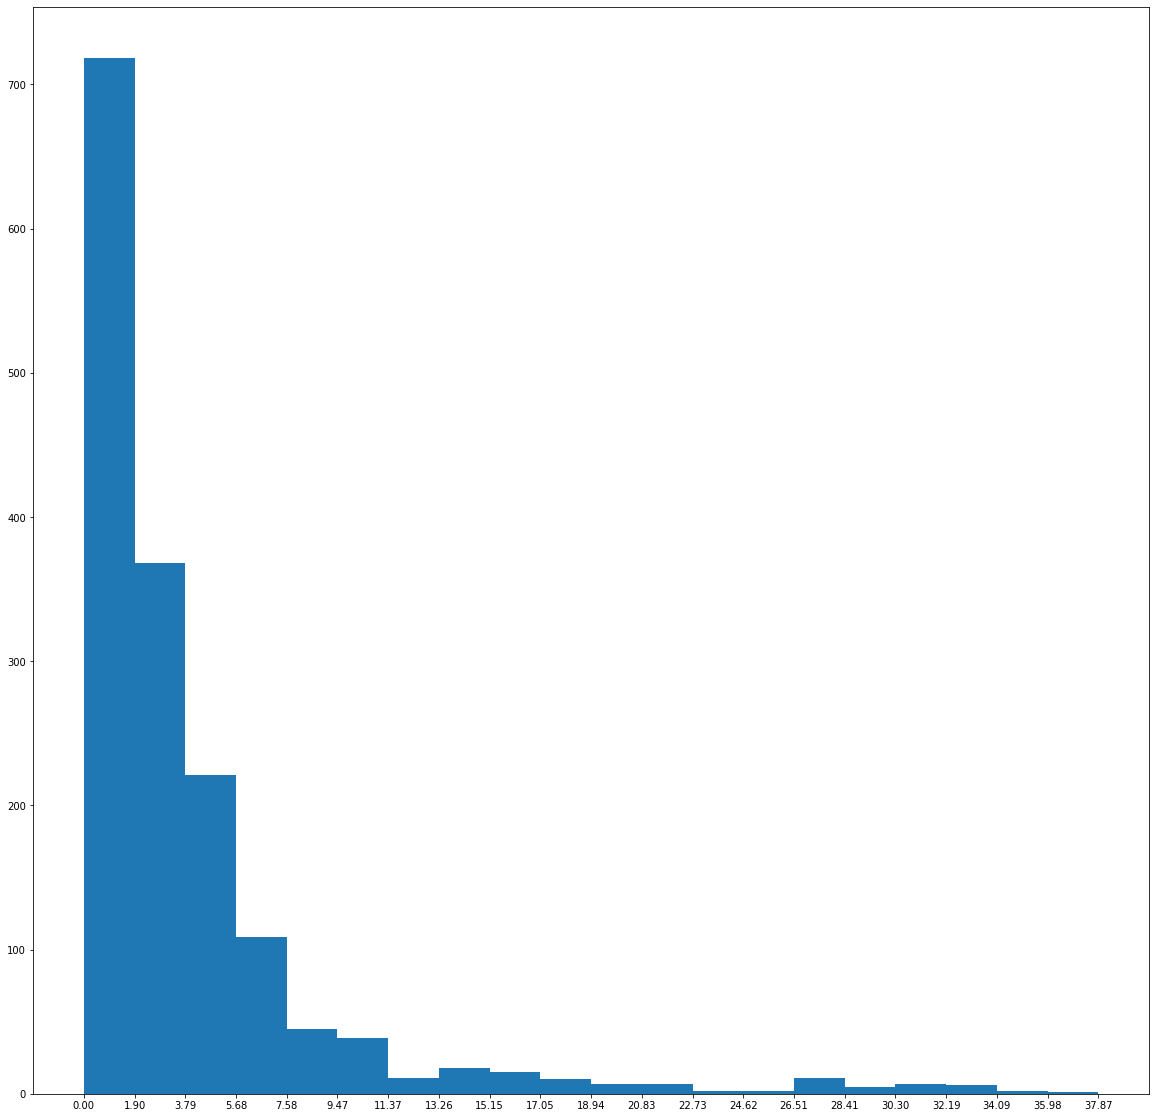

In [111]:

plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Horizontal Distance"],bins=20)
plt.xticks(bins)
plt.show()

In [112]:
df["Horizontal Distance"].fillna(0.0,inplace=True)

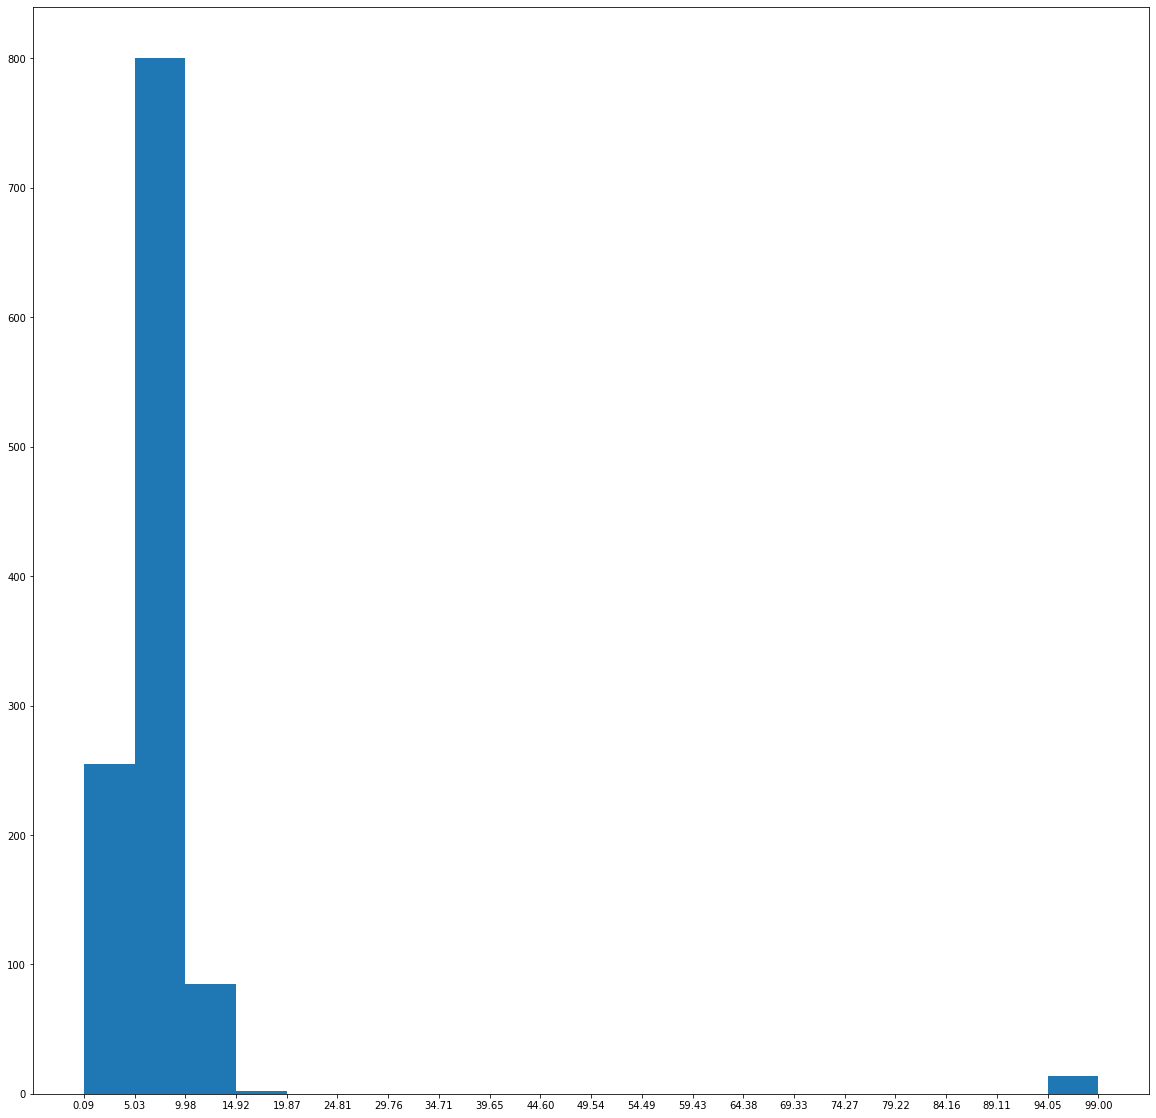

In [113]:


plt.figure(figsize=(20,20))
n,bins,patches = plt.hist(df["Horizontal Error"],bins=20)
plt.xticks(bins)
plt.show()

In [122]:
df["Horizontal Error"].fillna(df["Horizontal Error"].mode()[0],inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 23412 non-null  float64
 7   Depth Seismic Stations      23412 non-null  float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23412 non-null  object 
 10  Magnitude Error             23412 non-null  float64
 11  Magnitude Seismic Stations  23412 non-null  float64
 12  Azimuthal Gap               23412 non-null  float64
 13  Horizontal Distance         234

# Magnitude Shape 

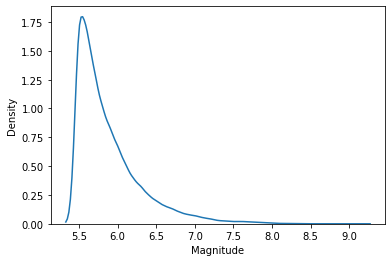

In [137]:
import seaborn as sns
sns.kdeplot(df["Magnitude"])

In [138]:
" Graph is Postively Skewed"

' Graph is Postively Skewed'

<BarContainer object of 12 artists>

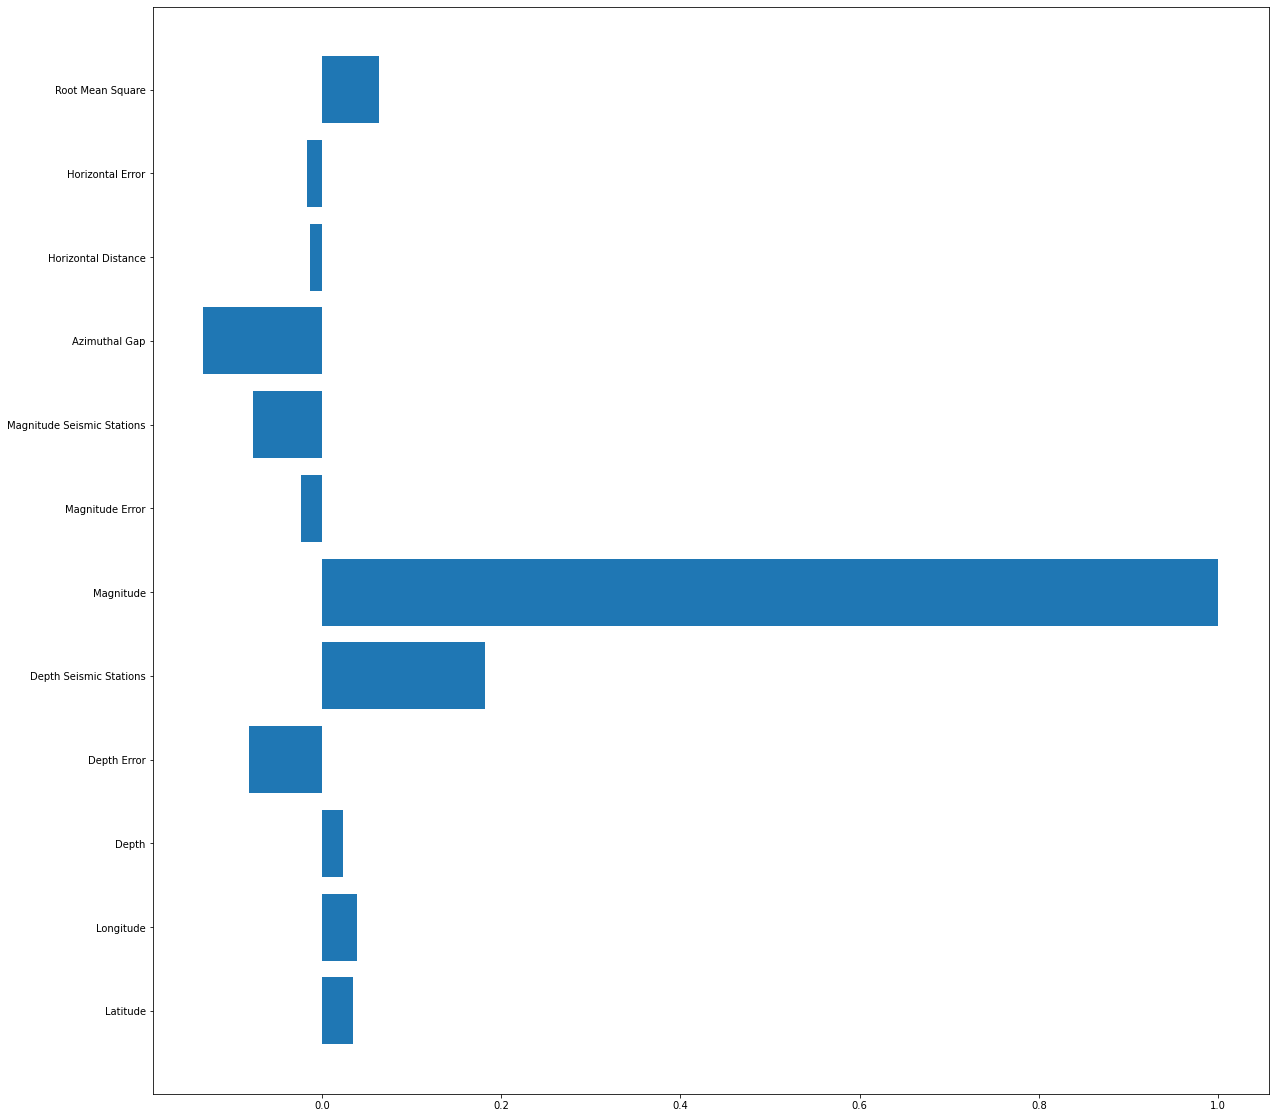

In [152]:
plt.figure(figsize=(20,20))
plt.barh(df.corr()["Magnitude"].index,width=df.corr()["Magnitude"])

EDA

In [153]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,2.570318,165.000726,5.882531,0.048333,5.360243,44.163532,0.273545,6.462368,1.016887
std,30.113183,125.511959,122.651898,2.430992,115.185664,0.423066,0.006686,25.833473,17.945596,1.731258,2.332863,0.162625
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,2.000000,117.000000,5.600000,0.048000,0.000000,44.163532,0.000000,6.400000,0.940000
50%,-3.568500,103.982000,33.000000,2.000000,117.000000,5.700000,0.048000,0.000000,44.163532,0.000000,6.400000,1.000000
75%,26.190750,145.026250,54.000000,2.000000,117.000000,6.000000,0.048000,0.000000,44.163532,0.000000,6.400000,1.100000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [154]:
df.describe(include="object")

,Date,Time,Type,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
count,23412,23412,23412,23412,23412,23412,23412,23412,23412
unique,12401,20472,4,10,23412,13,48,24,2
top,11/03/2011,2:56:58,Earthquake,MW,ISCGEM860706,US,US,US,Reviewed
freq,128,5,23232,7725,1,20630,20350,10458,20773


In [177]:
df["Date"] = pd.to_date(df['Date'])

AttributeError: ignored

In [180]:
df['Year'] = df['Date'].apply(lambda x:x.year)

In [187]:
year_count_nuclear=df[df["Type"]=="Nuclear Explosion"].groupby("Year").count()["Date"]

<BarContainer object of 28 artists>

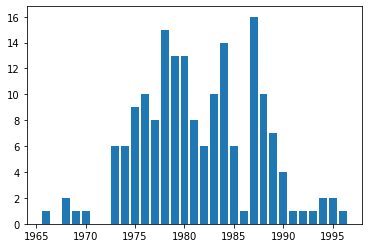

In [191]:
plt.bar(year_count_nuclear.index,height=year_count_nuclear)

In [195]:
pd.pivot(data=df,index="Type",columns=["Source"],value="Magnitude")

TypeError: ignored